In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from datetime import datetime
from imblearn.under_sampling import RandomUnderSampler
import pickle


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [24]:
data=pd.read_excel("C:/Users/Julien/Desktop/cours/Centrale/G2/IAS/bddias.xlsx",sheet_name="data")

Index(['No Cas', 'Date EntrÈe', 'Date Sortie', 'Date Naissance', 'Sexe',
       'CIM Diag Pr.', 'Cim Assoc 1', 'Cim Assoc 2', 'Cim Assoc 3',
       'Cim Assoc 4', 'Cim Assoc 5', 'CCAM 1', 'CCAM 2', 'CCAM 3', 'CCAM 4',
       'GHM Code', 'Colonne2', 'Colonne1', 'Molon', 'Anesthesiste',
       'Chirurgien', 'AnnÈe', 'ID Patient', 'Date Inter', 'Nom Patient',
       'Heure entrée SSPI avant intervention (cela correspond à un SAS de pré-anesthésie). Si cette heure est la même que l'heure d'entrée en salle d'opération, cela signifie qu'il n'y as pas eu de passage en SSPI pré op',
       'Heure d'entrée en salle d'opération (calimed)', 'Heure Incision ',
       'Heure de sortie de salle d'opération (calimed)', 'Anesth Type',
       'Anesth Loco_reg', 'DurÈe Sèjour en jour (1 pour ambu)', 'Interv Type',
       'Durée d'opération', 'urgence'],
      dtype='object')


<Axes: >

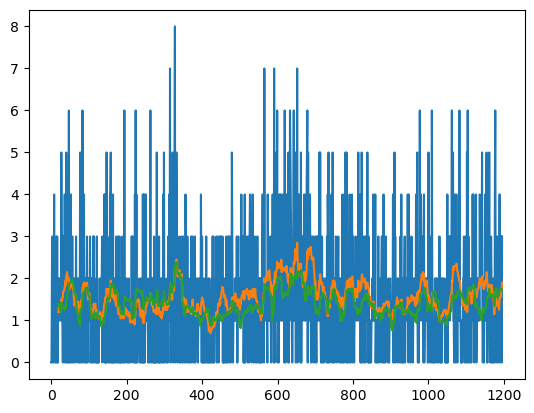

In [174]:
def isurgence(ccmi):
    if ccmi.startswith("S"):
        return 1
    else:
        return 0

print(data.columns)


data["urgence"]=data['CIM Diag Pr.'].apply(isurgence)
urg=data[["urgence","Date EntrÈe"]].groupby('Date EntrÈe').sum()
urg=urg.reset_index()
urg=urg['urgence']
rolling_mean = urg.rolling(window = 20).mean()
rolling_std = urg.rolling(window = 20).std()
urg.plot()
rolling_mean.plot()
rolling_std.plot()

C:\Users\Julien\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Julien\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Julien\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


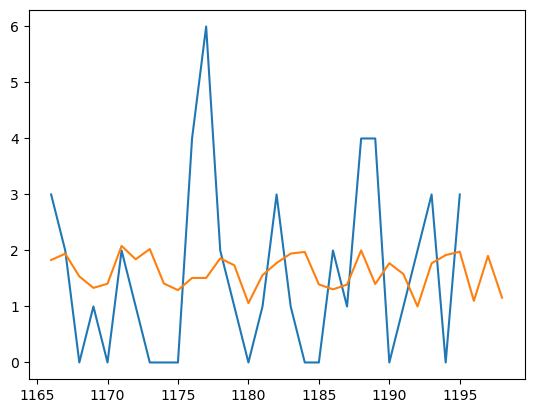

In [173]:

model = ARIMA(urg,order=(8,0,7))
results = model.fit()
##plt.plot(urg)
y=results.predict(len(urg)-30,len(urg)+2)
plt.plot(urg.iloc[len(urg)-30:len(urg)])
plt.plot(y)

